# Census Income Dataset

imbalanced dataset training|

<https://www.kaggle.com/wenruliu/adult-income-dataset?select=adult.csv>

## Load Basic Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [43]:
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [44]:
df = pd.read_csv('dataset/adult.csv')
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [45]:
df.shape

(48842, 15)

In [46]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [47]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [48]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


## Value Count Function

In [50]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [51]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [52]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [53]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [54]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [55]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [56]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [57]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [58]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [59]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

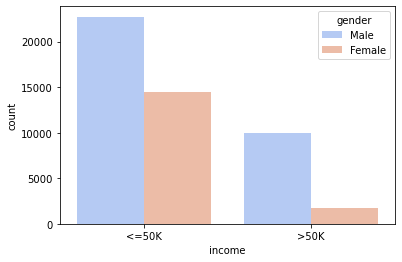

In [60]:
sns.countplot(df['income'], palette='coolwarm', hue='gender', data=df)

<AxesSubplot:xlabel='income', ylabel='count'>

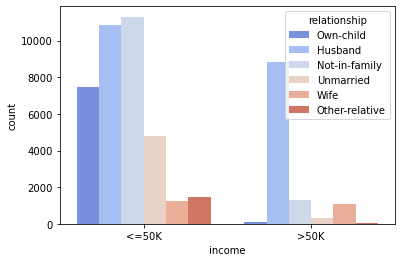

In [61]:
sns.countplot(df['income'], palette='coolwarm', hue='relationship', data=df)

## Filling ? Values

In [62]:
# rplace the values with mode
df['workclass'] = df['workclass'].replace('?', 'Private')
df['occupation'] = df['occupation'].replace('?', 'Prof-specialty')
df['native-country'] = df['native-country'].replace('?', 'United-States')

In [63]:
df.head(8)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K


## Feature engineering

In [71]:
# education category
df.education = df.education.replace(['12th', '11th', '10th',\
   '9th', '7th-8th', '5th-6th', '1st-4th', 'Preschool'], 'school')
df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Some-college'], 'college')
df.education.value_counts()

HS-grad        15784
college        14540
Bachelors       8025
school          6408
Masters         2657
Prof-school      834
Doctorate        594
Name: education, dtype: int64

In [70]:
# marital status
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absnet'], 'married')
df['marital-status'] = df['marital-status'].replace(['Divorced', 'Separated', 'Widowed'], 'other')
df['marital-status'].value_counts()

married                  22416
Never-married            16117
other                     9681
Married-spouse-absent      628
Name: marital-status, dtype: int64

In [68]:
# income
df['income'] = df.income.replace('<=50K', 0)
df['income'] = df.income.replace('>50K', 1)
df.income.value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [72]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


<AxesSubplot:>

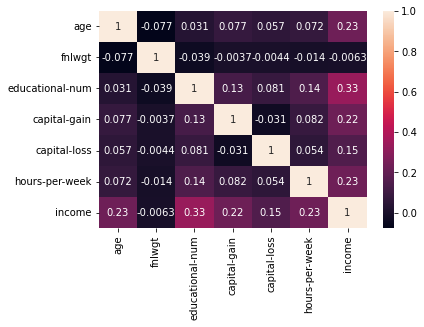

In [75]:
sns.heatmap(df.corr(), annot=True)

## Histogram

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'educational-num'}>],
       [<AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>],
       [<AxesSubplot:title={'center':'income'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

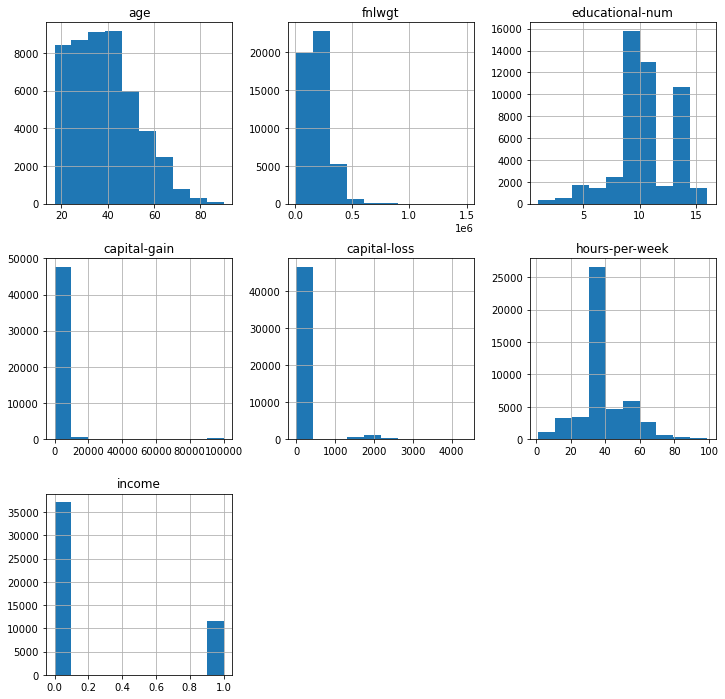

In [76]:
df.hist(figsize=(12, 12), layout=(3, 3), sharex=False)

## BoxPlot

age                   AxesSubplot(0.125,0.657941;0.227941x0.222059)
fnlwgt             AxesSubplot(0.398529,0.657941;0.227941x0.222059)
educational-num    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
capital-gain          AxesSubplot(0.125,0.391471;0.227941x0.222059)
capital-loss       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
hours-per-week     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
income                   AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

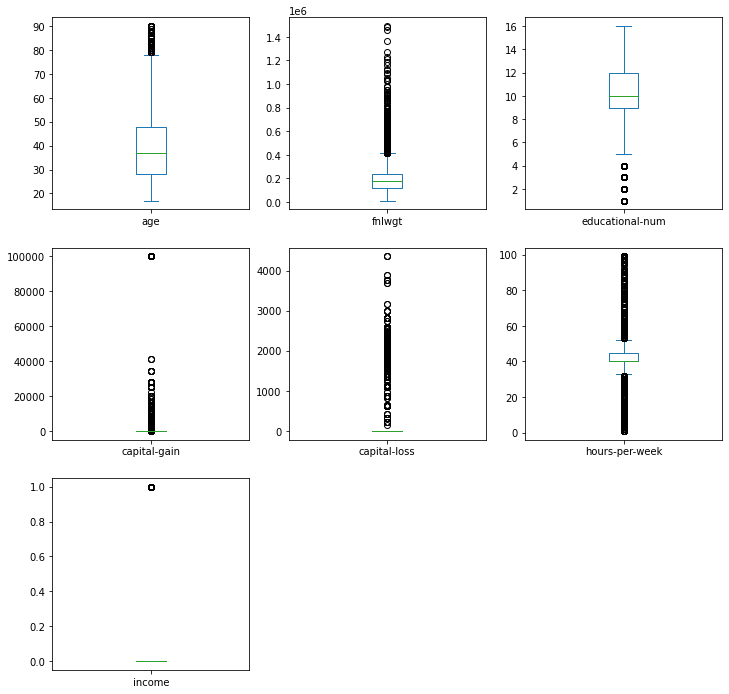

In [77]:
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)

## Plotly

In [80]:
px.pie(df, values='educational-num', names='education',\
   title='% of education', color_discrete_sequence=px.colors.qualitative.T10)

## Model Building

In [81]:
X = df.drop(['income'], axis=1)
y = df['income']

## Feature Scaling

In [82]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [86]:
df1 = df.copy()
df1 = df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3,19329,6,6,1,6,3,2,1,0,0,39,38,0
1,21,3,4212,2,8,2,4,0,4,1,0,0,49,38,0
2,11,1,25340,5,11,2,10,0,4,1,0,0,39,38,1
3,27,3,11201,5,9,2,6,0,2,1,98,0,39,38,1
4,1,3,5411,5,9,1,9,3,4,0,0,0,29,38,0


In [88]:
ss = StandardScaler().fit(df1.drop('income', axis=1))

In [89]:
X = ss.transform(df1.drop('income', axis=1))
y = df['income']

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

## Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

print(f'Acc on train data: {accuracy_score(y_train, lr.predict(X_train))}')
print(f"Acc on test data: {accuracy_score(y_test, prediction)}")

Acc on train data: 0.824124718476703
Acc on test data: 0.8267249027502901
